In [1]:
import networkx as nx

G = nx.DiGraph()


In [2]:
import os
import json

directory_path = './data'

for subdir, dirs, files in os.walk(directory_path):
    for file in files:
        filepath = subdir + os.sep + file
        if filepath.endswith(".json"):
            with open(filepath, 'r', encoding='utf-8') as json_file:
                data = json.load(json_file)
                page_title = data['title']
                G.add_node(page_title)
                for outpage in data['outpages']:
                    G.add_edge(page_title, outpage)


Number of Nodes: 26720
Number of Edges: 44777
Average Degree: 3.35


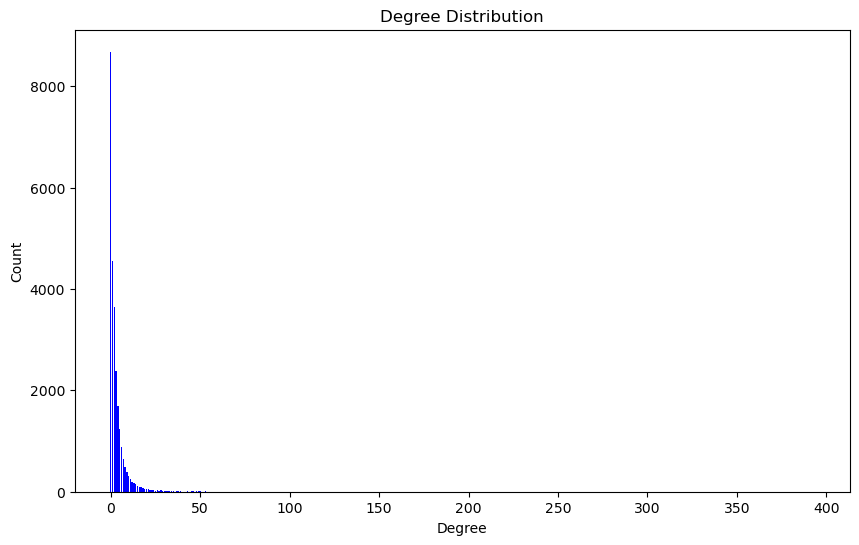

Graph Density: 0.0001


In [3]:
from collections import Counter
import networkx as nx
import matplotlib.pyplot as plt

# Assuming G is your graph

# Number of nodes and edges
num_nodes = G.number_of_nodes()
num_edges = G.number_of_edges()

print(f"Number of Nodes: {num_nodes}")
print(f"Number of Edges: {num_edges}")

# Average degree
avg_degree = sum(dict(G.degree()).values()) / num_nodes
print(f"Average Degree: {avg_degree:.2f}")

# Degree distribution
degree_sequence = sorted([d for n, d in G.degree()], reverse=True)
degree_count = Counter(degree_sequence)
deg, cnt = zip(*degree_count.items())

plt.figure(figsize=(10, 6))
plt.bar(deg, cnt, width=0.80, color="b")
plt.title("Degree Distribution")
plt.ylabel("Count")
plt.xlabel("Degree")
plt.show()

# Graph density
density = nx.density(G)
print(f"Graph Density: {density:.4f}")


In [4]:
import pandas as pd

all_names = pd.read_csv("../all_page_names.csv")

len(all_names["Page Names"]) ,len(set(all_names["Page Names"])) # some games names are repeated curios! 

(27362, 26720)

In [5]:
# Visualize graph
import networkx as nx
pos = nx.spring_layout(G)
nx.draw(G, pos, with_labels=True)
plt.show()

KeyboardInterrupt: 

In [6]:
# Maybe we need this
import powerlaw

fit = powerlaw.Fit(degree_sequence)
alpha = fit.power_law.alpha

print(f"Estimated Power-Law Exponent (alpha): {alpha}")

Estimated Power-Law Exponent (alpha): 3.337340469738638


Values less than or equal to 0 in data. Throwing out 0 or negative values
Calculating best minimal value for power law fit
/Users/madis/anaconda3/lib/python3.11/site-packages/powerlaw.py:699: RuntimeWarning: invalid value encountered in divide
  (CDF_diff**2) /


In [8]:
from math import log

connected = False
k_avg = sum(dict(G.degree()).values()) / len(G)

print(f"<k>={k_avg} & ln(N)={log(num_nodes)}")

response = ""

if 0 < k_avg < 1:
    response += "The network is in the subcritical regime "
elif k_avg == 1:
    response += "The network is in the critical point regime "
elif k_avg > 1:
    response += "The network is in the supercritical regime"
elif k_avg > log(num_nodes):
    response += "The network is in the connected regime"
response +=  "and is not connected."
print(response)

<k>=3.3515718562874253 & ln(N)=10.193167627650581
The network is in the supercritical regimeand is not connected.
